# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [5]:
df  = pd.read_csv('previsao_de_renda.csv',na_values=('NA','',' ','nan','NAN','na'))
df.head()


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


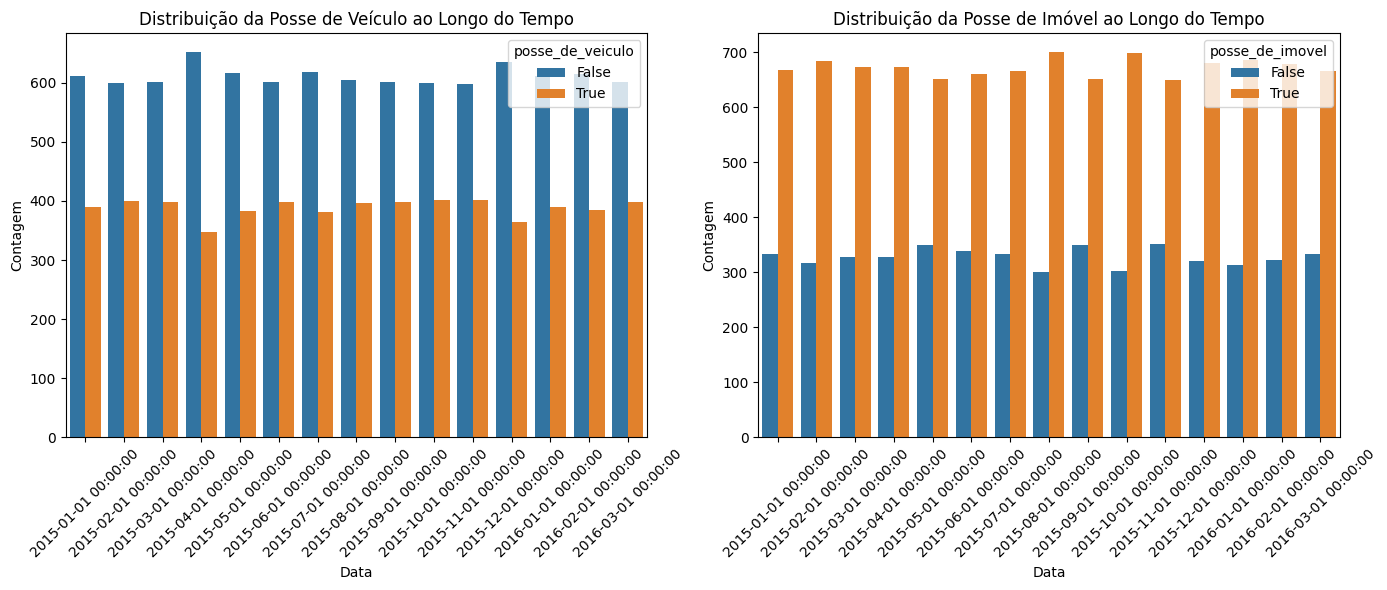

In [8]:
# Garantir que a coluna data_ref está no formato datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Contar a distribuição das variáveis qualitativas ao longo do tempo
posse_veiculo = df.groupby(['data_ref', 'posse_de_veiculo']).size().reset_index(name='count')
posse_imovel = df.groupby(['data_ref', 'posse_de_imovel']).size().reset_index(name='count')

# Criar o gráfico
plt.figure(figsize=(14, 6))

# Gráfico para posse de veículo
plt.subplot(1, 2, 1)
sns.barplot(data=posse_veiculo, x='data_ref', y='count', hue='posse_de_veiculo')
plt.title('Distribuição da Posse de Veículo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

# Gráfico para posse de imóvel
plt.subplot(1, 2, 2)
sns.barplot(data=posse_imovel, x='data_ref', y='count', hue='posse_de_imovel')
plt.title('Distribuição da Posse de Imóvel ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

As quantidades de clientes que possuem ou não veículo ou imóvel se mantiverem ligeiramente estáveis no período analisado. Apesar de Março de 2015 ter visto a maior diferença entre posse e não posse de veículo e Julho de 2015 ter visto a maior diferença entre posse ou não de imóveis os valores parecem ser estáveis.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

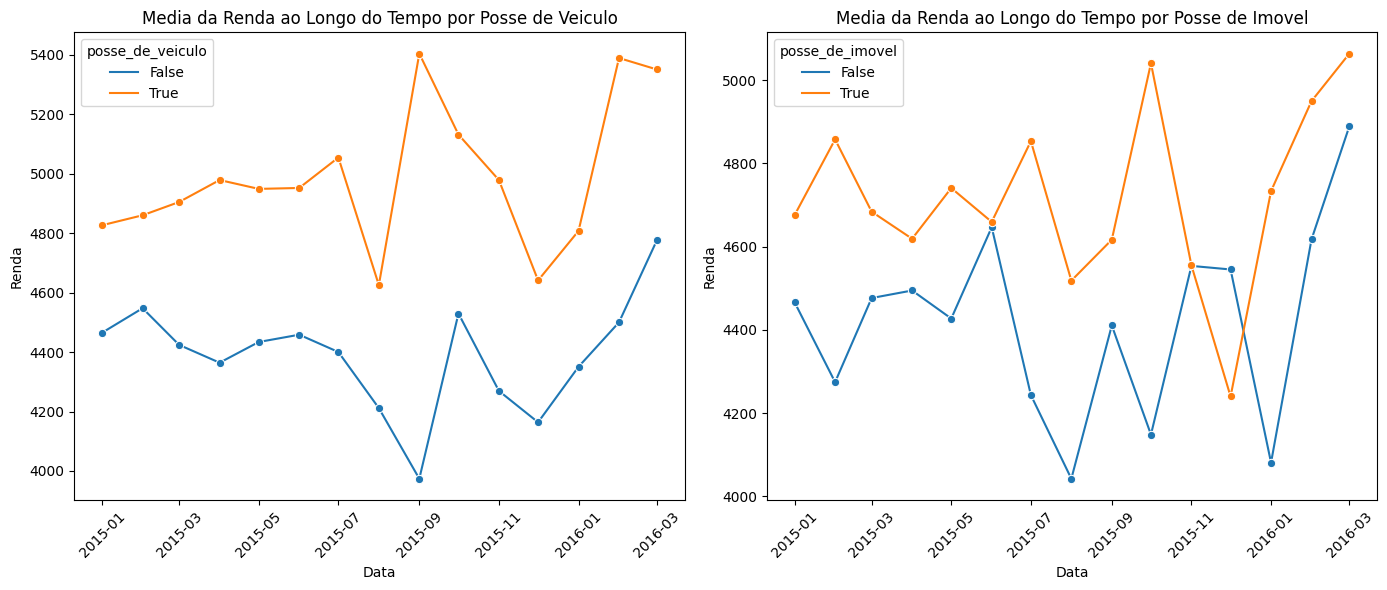

In [12]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

media_veiculo = df.groupby(['data_ref', 'posse_de_veiculo'])['renda'].mean().reset_index()
media_imovel = df.groupby(['data_ref', 'posse_de_imovel'])['renda'].mean().reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=media_veiculo, x='data_ref', y='renda', hue = 'posse_de_veiculo', marker='o')
plt.title('Media da Renda ao Longo do Tempo por Posse de Veiculo')
plt.xlabel('Data')
plt.ylabel('Renda')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=media_imovel, x='data_ref', y='renda', hue = 'posse_de_imovel', marker='o')
plt.title('Media da Renda ao Longo do Tempo por Posse de Imovel')
plt.xlabel('Data')
plt.ylabel('Renda')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Essas vbariáveis podem fornecer algum insight em uma modelagem visto que as médias são significativamente diferentes. Existem também um padrão em que dos meses de junho a julho a renda dos que possuem carro e imóvel tende a crescer e a dos que não possuem tende a cair. Esse padrão também indica que essas variáveis podem ser utilizadas em uma modelagem. 